#### Transformation of Features
Why Transformation of Features Are Required?

Linear Regression---Gradient Descent ----Global Minima
Algorithms like KNN,K Means,Hierarichal Clustering--- Eucledian Distance
Every Point has some vectors and Direction

Deep Learning Techniques(Standardization, Scaling) 

1.ANN--->GLobal Minima, Gradient 2.CNN 3.RNN

0-255 pixels

#### Types of transformation
1. Normalization and standardization
2. scaling to min and max values
3. scaling to median and quantiles 
4. Gaussian transformation, Logirathmic transformation, reciprocal transformation, square root transformation, exponential transformation, box-cox transformation

#### Standardization
we will bring down all the variables or features to a similar scale. stadardization means centering all the values to zero.

z = (x-x_mean)/std

In [13]:
import pandas as pd
df = pd.read_csv('titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [31]:
bool_feature = [feature for feature in df.columns if df[feature].dtypes=='bool']
bool_feature

['adult_male', 'alone']

In [33]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes!='O' and feature not in bool_feature]
numerical_features

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

In [38]:
# for feature in numerical_features:
df = df[numerical_features]
df.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [39]:
df = df.drop(['sibsp','parch'],axis=1)
df.head()

,survived,pclass,age,fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [40]:
df.isnull().sum()

survived      0
pclass        0
age         177
fare          0
dtype: int64

In [41]:
df['age'].fillna(df.age.median(),inplace=True)

In [42]:
##Standardization: use satndardScaler library from sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [43]:
df_scaled = scaler.fit_transform(df)
df_scaled

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

In [44]:
pd.DataFrame(df_scaled)

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot: ylabel='Count'>

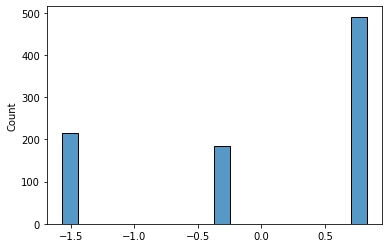

In [50]:
sns.histplot(data=df_scaled,x=df_scaled[:,1],bins=20)

<AxesSubplot: ylabel='Count'>

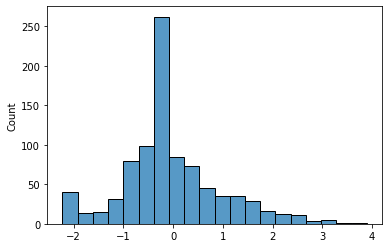

In [49]:
sns.histplot(data=df_scaled,x=df_scaled[:,2],bins=20)

<AxesSubplot: ylabel='Count'>

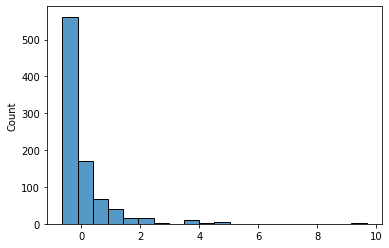

In [51]:
sns.histplot(data=df_scaled,x=df_scaled[:,3],bins=20)

<AxesSubplot: xlabel='fare', ylabel='Count'>

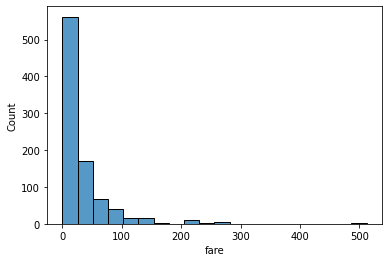

In [52]:
sns.histplot(data=df,x=df['fare'],bins=20)

#### Min Max scaling (### CNN)---> Deep Learning techniques
Min Max scaling scales the values between 0 to 1

X_scaled = (X-X_min)/(X_max-X_min)
 

In [55]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df_minmax = pd.DataFrame(min_max.fit_transform(df),columns=df.columns)
df_minmax.head()

,survived,pclass,age,fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


<AxesSubplot: xlabel='pclass', ylabel='Count'>

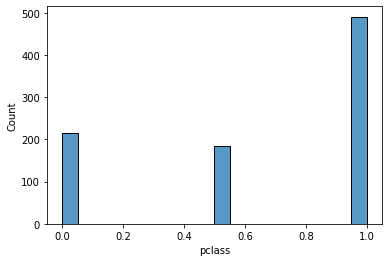

In [57]:
sns.histplot(data=df_minmax,x='pclass',bins=20)

<AxesSubplot: xlabel='age', ylabel='Count'>

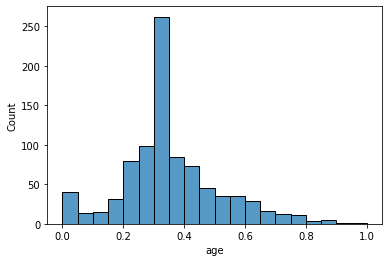

In [58]:
sns.histplot(data=df_minmax,x='age',bins=20)

<AxesSubplot: xlabel='fare', ylabel='Count'>

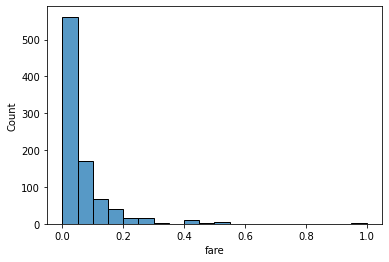

In [59]:
sns.histplot(data=df_minmax,x='fare',bins=20)

#### Robust Scaler
It is used to scale the feature to median and quantiles Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

0,1,2,3,4,5,6,7,8,9,10

9-90 percentile---90% of all values in this group is less than 9 1-10 precentile---10% of all values in this group is less than 1

In [60]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
df_robust = pd.DataFrame(robust_scaler.fit_transform(df),columns=df.columns)
df_robust.head()

,survived,pclass,age,fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


<AxesSubplot: xlabel='fare', ylabel='Count'>

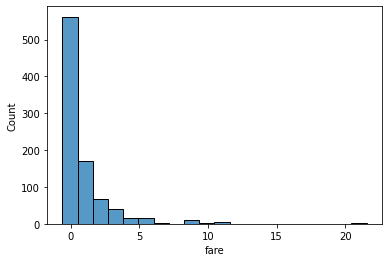

In [61]:
sns.histplot(data=df_robust,x='fare',bins=20)

<AxesSubplot: xlabel='age', ylabel='Count'>

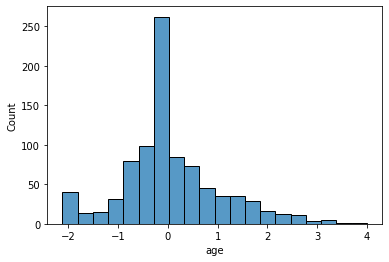

In [62]:
sns.histplot(data=df_robust,x='age',bins=20)

<AxesSubplot: xlabel='pclass', ylabel='Count'>

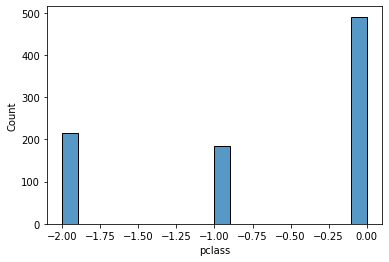

In [63]:
sns.histplot(data=df_robust,x='pclass',bins=20)

#### All types of transformation
Guassian Transformation

Some machine learning algorithms like linear and logistic assume that the features are normally distributed -Accuracy -Performance

1. logarithmic transformation
2. reciprocal transformation
3. square root transformation
4. exponential transformation (more general, you can use any exponent)
5. boxcox transformation

In [65]:
df=pd.read_csv('titanic.csv',usecols=['age','fare','survived'])
df.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [66]:
### fillnan
df['age']=df['age'].fillna(df['age'].median())

In [67]:
df.isnull().sum()

survived    0
age         0
fare        0
dtype: int64

In [68]:
import scipy.stats as stat
import pylab 


In [69]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

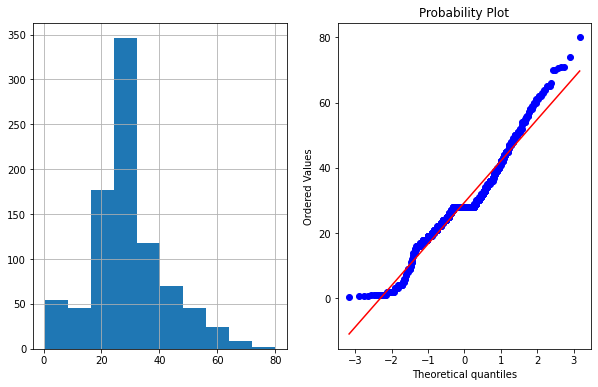

In [71]:
plot_data(df,'age')

#### logarithmic transformation

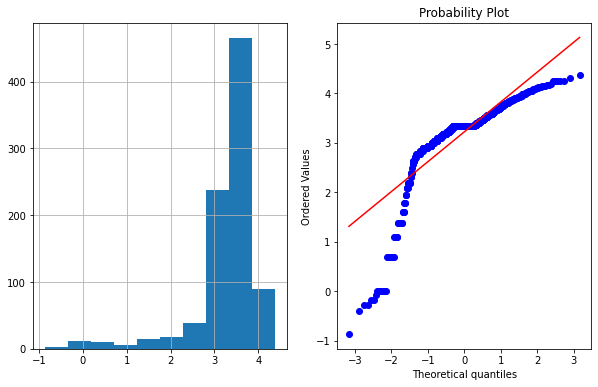

In [73]:
import numpy as np
df['age_log']=np.log(df['age'])
plot_data(df,'age_log')

#### Reciprocal Trnasformation

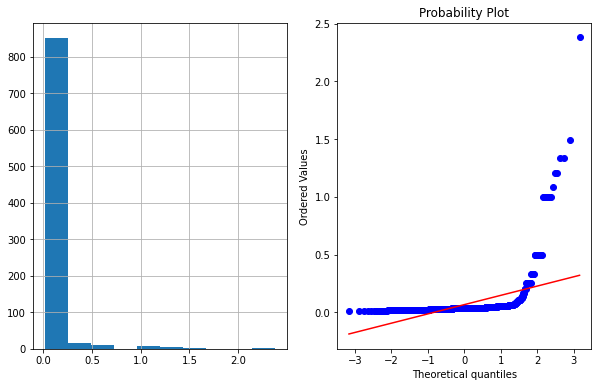

In [75]:
df['age_reciprocal']=1/df.age
plot_data(df,'age_reciprocal')

##### Square Root Transformation


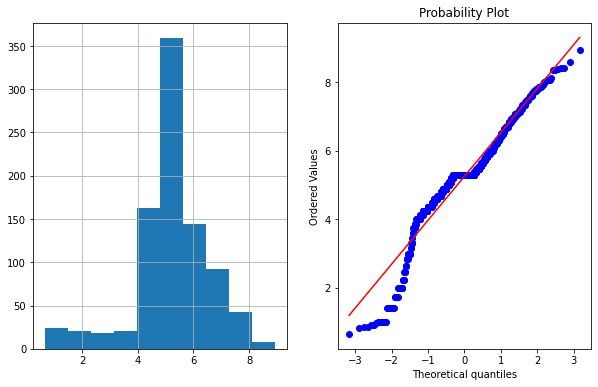

In [76]:
df['Age_sqaure']=df.age**(1/2)
plot_data(df,'Age_sqaure')

#### Exponential Transformation


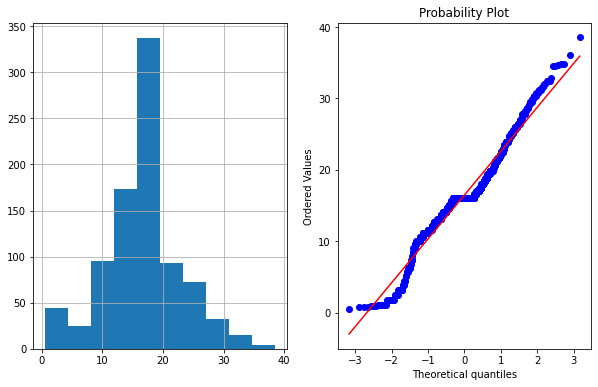

In [77]:
df['Age_exponential']=df.age**(1/1.2)
plot_data(df,'Age_exponential')

#### BoxCOx Transformation
The Box-Cox transformation is defined as:

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

In [78]:
df['Age_Boxcox'],parameters=stat.boxcox(df['age'])

In [79]:
print(parameters)

0.7964531473656952


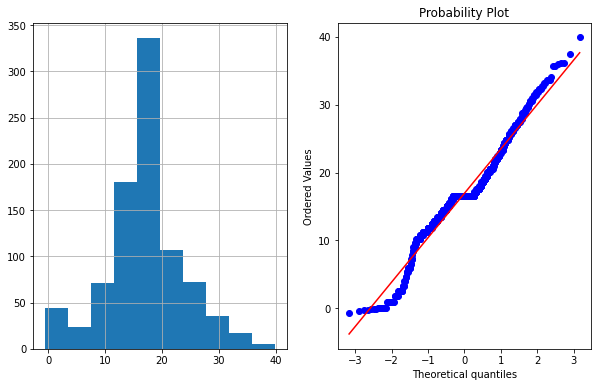

In [80]:
plot_data(df,'Age_Boxcox')

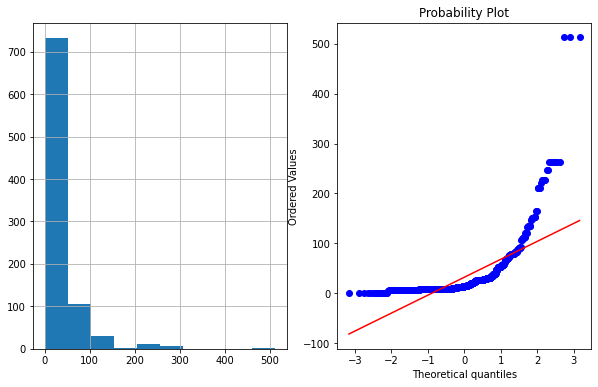

In [81]:
plot_data(df,'fare')

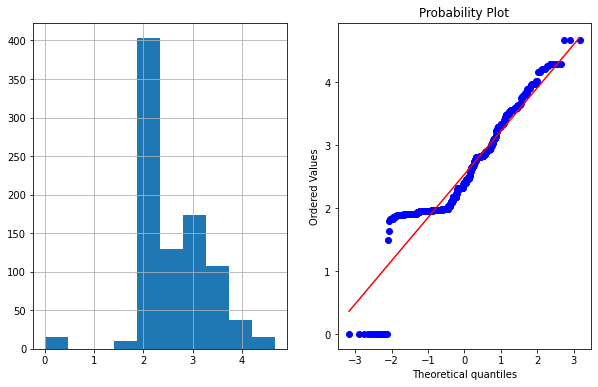

In [82]:
df['Fare_Boxcox'],parameters=stat.boxcox(df['fare']+1)
plot_data(df,'Fare_Boxcox')